In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set()


In [2]:
df = pd.read_csv(
    "../data/raw/MachineLearningRating_v3.txt",
    sep="|",
    header=0,
    low_memory=False,
    encoding="utf-8"
)

df.head()


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [3]:
df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UnderwrittenCoverID,1000098.0,NaN,NaN,NaN,104817.546075,63293.708455,1.0,55143.0,94083.0,139190.0,301175.0
PolicyID,1000098.0,NaN,NaN,NaN,7956.68245,5290.03851,14.0,4500.0,7071.0,11077.0,23246.0
TransactionMonth,1000098,23,2015-08-01 00:00:00,106747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsVATRegistered,1000098,2,False,995075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Citizenship,1000098,4,,895210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LegalType,1000098,6,Individual,911929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title,1000098,5,Mr,933555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Language,1000098,1,English,1000098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bank,854137,11,First National Bank,260811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountType,959866,3,Current account,597938,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"], errors="coerce")

df["TotalPremium"] = pd.to_numeric(df["TotalPremium"], errors="coerce")
df["TotalClaims"] = pd.to_numeric(df["TotalClaims"], errors="coerce")


In [5]:
missing = df.isna().sum().sort_values(ascending=False)
missing.head(15)


NumberOfVehiclesInFleet    1000098
CrossBorder                 999400
CustomValueEstimate         779642
Rebuilt                     641901
Converted                   641901
WrittenOff                  641901
NewVehicle                  153295
Bank                        145961
AccountType                  40232
Gender                        9536
MaritalStatus                 8259
VehicleType                    552
make                           552
mmcode                         552
Model                          552
dtype: int64

In [30]:
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"].replace(0, np.nan)
df["LossRatio"].describe()


count    618464.000000
mean          0.349885
std           9.286479
min         -18.700122
25%           0.000000
50%           0.000000
75%           0.000000
max        2553.600000
Name: LossRatio, dtype: float64

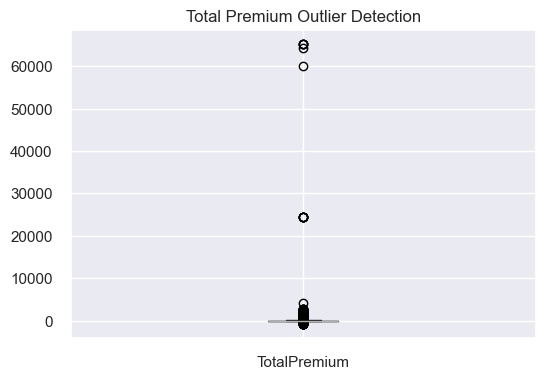

In [6]:
df.boxplot(column=["TotalPremium"], figsize=(6,4))
plt.title("Total Premium Outlier Detection")
plt.savefig("../reports/figures/total_premium_outliers.png", dpi=200)
plt.show()


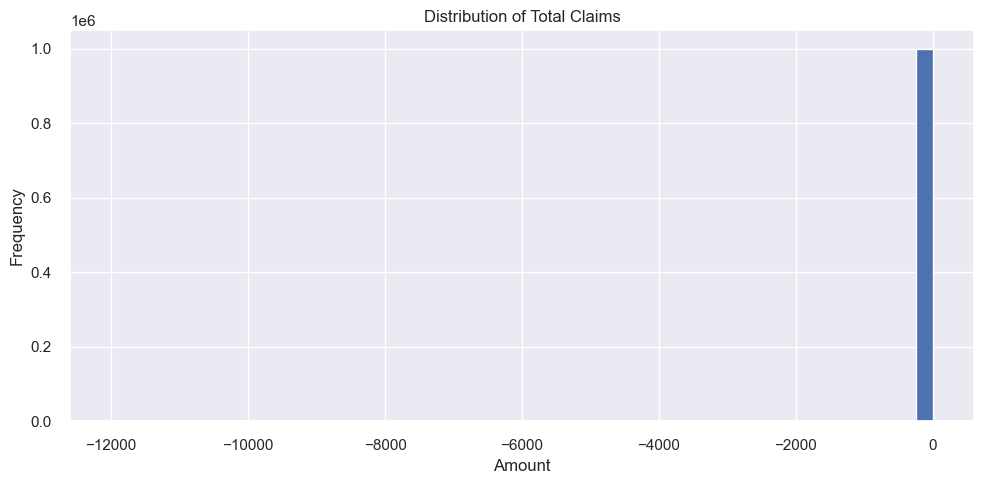

In [7]:
plt.figure(figsize=(10,5))
df["TotalClaims"].clip(upper=df["TotalClaims"].quantile(0.99)).hist(bins=50)
plt.title("Distribution of Total Claims")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("../reports/figures/claims_distribution.png", dpi=200)
plt.show()


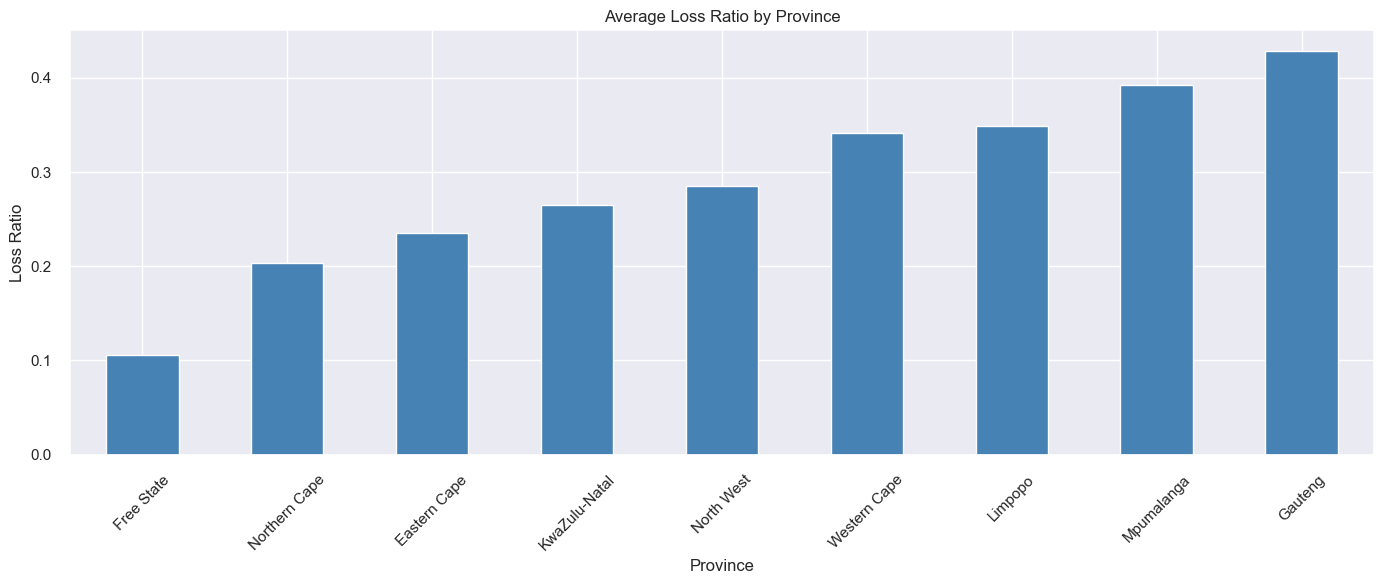

In [33]:
plt.figure(figsize=(14,6))
df.groupby("Province")["LossRatio"].mean().sort_values().plot(
    kind="bar", color="steelblue"
)
plt.title("Average Loss Ratio by Province")
plt.ylabel("Loss Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../reports/figures/province_loss_ratio.png", dpi=200)
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4268\826935481.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_month = df.groupby(pd.Grouper(key="TransactionMonth", freq="M")).agg(


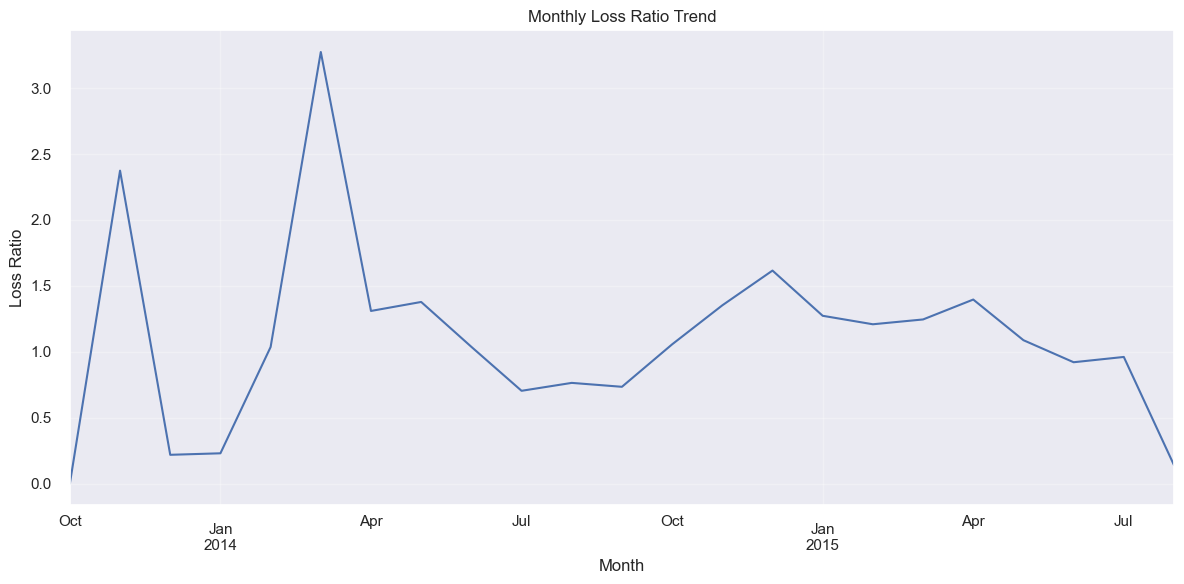

In [8]:
df_month = df.groupby(pd.Grouper(key="TransactionMonth", freq="M")).agg(
    total_premium=("TotalPremium", "sum"),
    total_claims=("TotalClaims", "sum")
)

df_month["loss_ratio"] = df_month["total_claims"] / df_month["total_premium"]

plt.figure(figsize=(12,6))
df_month["loss_ratio"].plot()
plt.title("Monthly Loss Ratio Trend")
plt.xlabel("Month")
plt.ylabel("Loss Ratio")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("../reports/figures/monthly_loss_ratio_trend.png", dpi=200)
plt.show()


In [11]:
df["TotalPremium"] = pd.to_numeric(df["TotalPremium"], errors="coerce")
df["TotalClaims"] = pd.to_numeric(df["TotalClaims"], errors="coerce")

df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"].replace(0, np.nan)


In [12]:
gender_risk = df.groupby("Gender")["LossRatio"].mean().sort_values()
gender_risk


Gender
Not specified    0.347904
Male             0.348852
Female           0.491979
Name: LossRatio, dtype: float64

In [13]:
vehicle_risk = df.groupby("VehicleType")["LossRatio"].mean().sort_values()
vehicle_risk.head(15)


VehicleType
Bus                  0.000000
Passenger Vehicle    0.337368
Medium Commercial    0.493356
Light Commercial     0.543917
Heavy Commercial     0.793617
Name: LossRatio, dtype: float64

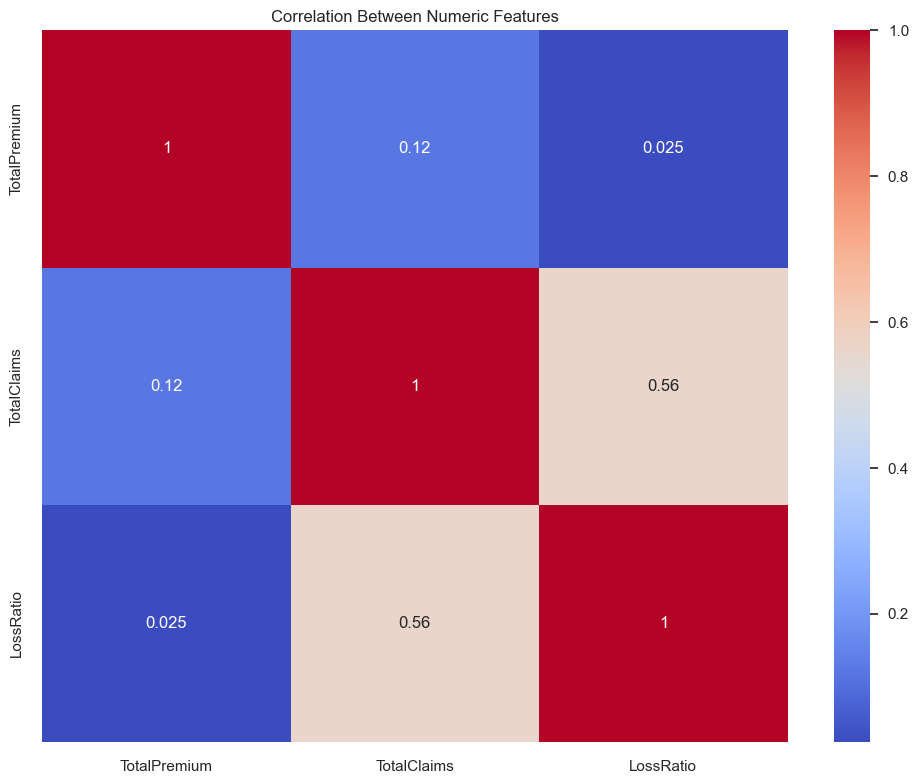

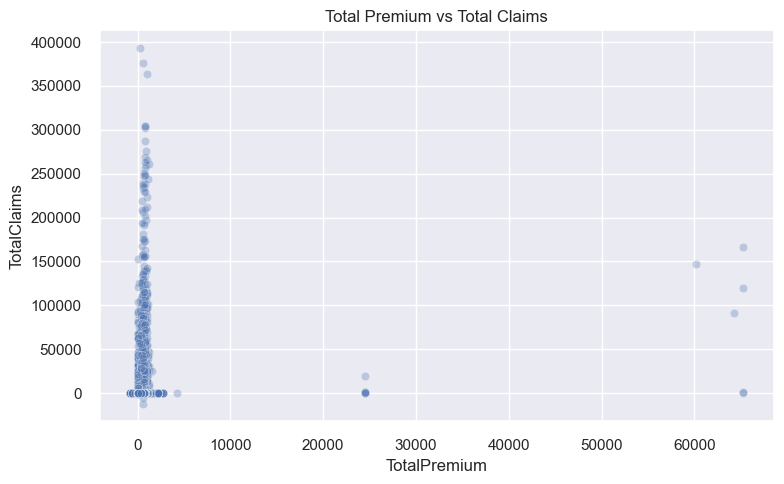

In [14]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df[["TotalPremium", "TotalClaims", "LossRatio"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Features")
plt.tight_layout()
plt.savefig("../reports/figures/correlation_matrix.png", dpi=200)
plt.show()

# Scatter: Premium vs Claims
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="TotalPremium", y="TotalClaims", alpha=0.3)
plt.title("Total Premium vs Total Claims")
plt.tight_layout()
plt.savefig("../reports/figures/premium_vs_claims_scatter.png", dpi=200)
plt.show()
